In [1]:
from utils import *
from preprocessing import *

matplotlib.style.use('ggplot')

In [2]:
df_date = load_date_frame('wilmington')

Data loaded


In [3]:
# WOCategories
WO_count = df_date.groupby(['WOCATEGORY'])['WORKORDERKEY'].count()\
                                                          .reset_index(name='count') \
                                                          .set_index('WOCATEGORY')\
                                                          .sort_values(['count'], ascending=False) 
            
category_encoder = {}
for i, cat in enumerate(WO_count.index):
    category_encoder.update({i:cat})
print(WO_count)

                                                    count
WOCATEGORY                                               
C-2 (Maintenance only)                               1857
B-4 (Inspections, Maintenance)                        917
B-3 (Inspections, Modifications, Maintenance)         360
C-1 (Maintenance, Modifications)                      251
C-4 (Engines)                                          91
A-4 (Pre-purchase, Inspections, Maintenance)           90
C-5 (Components)                                       61
C-3 (Work performed at another location)               50
B-2 (Inspections, Import/Export, Maintenance)          27
A-2 (Pre-purchase, Inspections, Import/Export, ...     19
M-1 (Misc Internal and billing related items)          11
B-1 (Inspections, Import/Export, Modifications,...     10
A-1 (Pre-purchase, Inspections, Import/Export, ...      6
A-3 (Pre-purchase, Inspections, Modifications, ...      6


########   Time spend in the hangar : DESCRIPTION   #########
count    4085.000000
mean       22.232313
std        51.882888
min         0.000000
25%         2.000000
50%         7.000000
75%        21.000000
max       814.000000
Name: length_of_time_in_days, dtype: float64


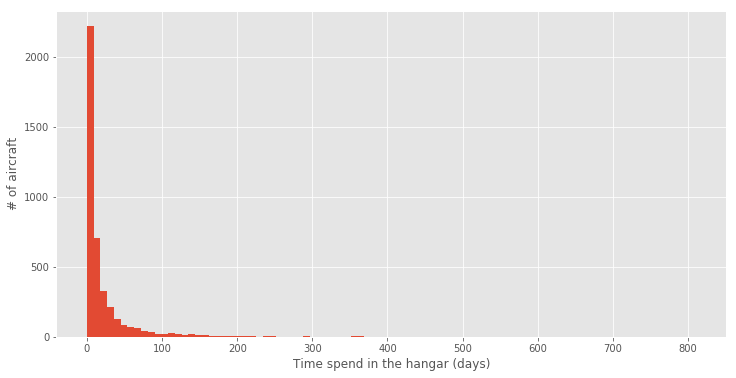

In [4]:
##Average time :

print('########   Time spend in the hangar : DESCRIPTION   #########')
time_in_days = df_date.length_of_time_in_days
print(time_in_days.describe())


fig = plt.figure(figsize=(12,6))
time_in_days.hist(bins=range(0, int(max(time_in_days)+1) , int(max(time_in_days)/90) ))
plt.xlabel('Time spend in the hangar (days)')
plt.ylabel('# of aircraft')
plt.show()

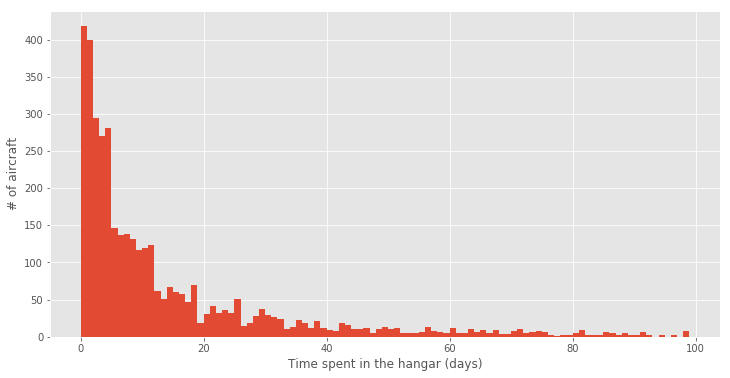

In [5]:
# Cutting the tail
fig = plt.figure(figsize=(12,6))
time_in_days.hist(bins=range(0,100))
plt.xlabel('Time spent in the hangar (days)')
plt.ylabel('# of aircraft')
plt.show()

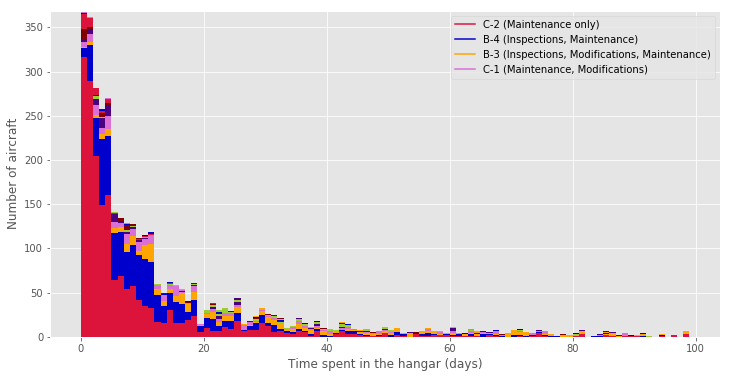

In [6]:
# Stacked category
time_by_category = []
for i in range(len(category_encoder)):
    cat = category_encoder[i]
    time_by_category.append(time_in_days.loc[df_date.WOCATEGORY == cat])
    
colors = ['crimson' , 'mediumblue', 'orange', 'orchid','indigo', 'yellowgreen', 'maroon']

fig, ax = plt.subplots(figsize=(12,6))
plt.hist(x=time_by_category, bins=range(0,100), stacked=True, color=colors+colors)
plt.xlabel('Time spent in the hangar (days)')
plt.ylabel('Number of aircraft')


#adding a legend only for the 3 main categories
custom_lines = [Line2D([0], [0], color=colors[0]),
                Line2D([0], [0], color=colors[1]),
                Line2D([0], [0], color=colors[2]),
                Line2D([0], [0], color=colors[3])]
ax.legend(custom_lines, [category_encoder[0],category_encoder[1],category_encoder[2],category_encoder[3]])

plt.show()

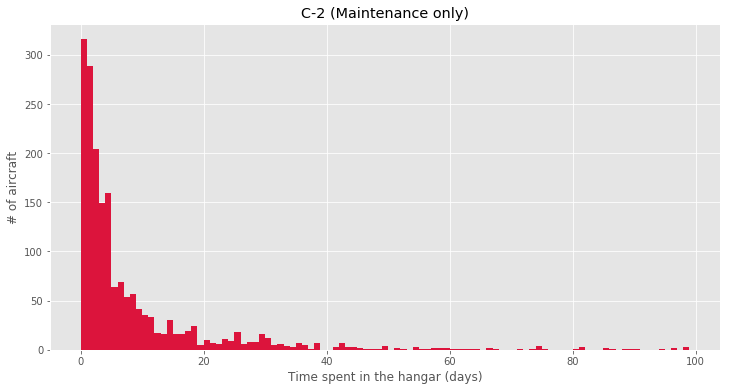

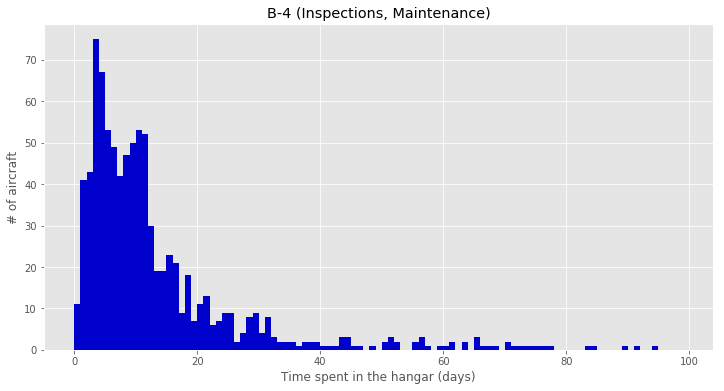

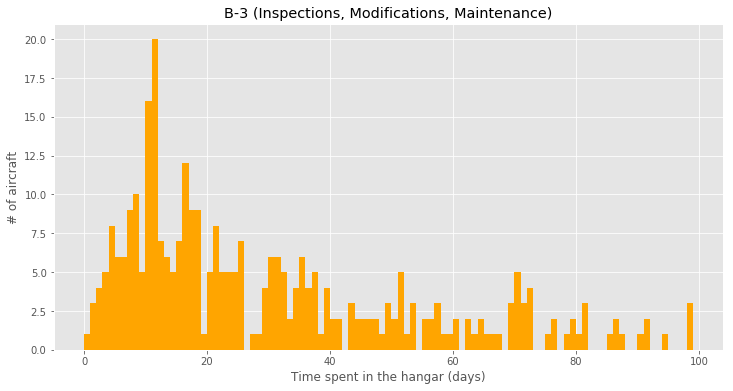

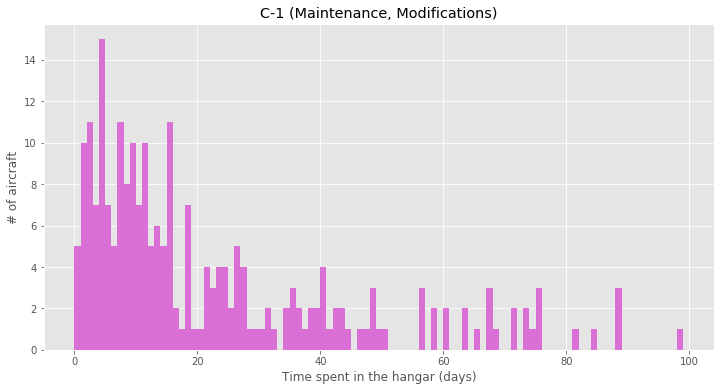

In [7]:
#plot for the 4 main categories :
for i in range(4): 
    cat = category_encoder[i]
    
    fig = plt.figure(figsize=(12,6))
    time_by_category[i].hist(bins=range(0,100), color=colors[i%7])
    plt.xlabel('Time spent in the hangar (days)')
    plt.ylabel('# of aircraft')
    plt.title(cat)
    plt.show()

In [8]:
# barchart with the number of aircraft in the hangar for each day

In [9]:
def daterange(start_date, end_date):
    for n in range(int ((end_date - start_date).days)):
        yield start_date + timedelta(n)

list_of_days = []
for start_date, end_date in zip(df_date.start, df_date.finish):
    for single_date in daterange(start_date, end_date):
        list_of_days.append(single_date)
tmp_series = pd.Series(list_of_days)

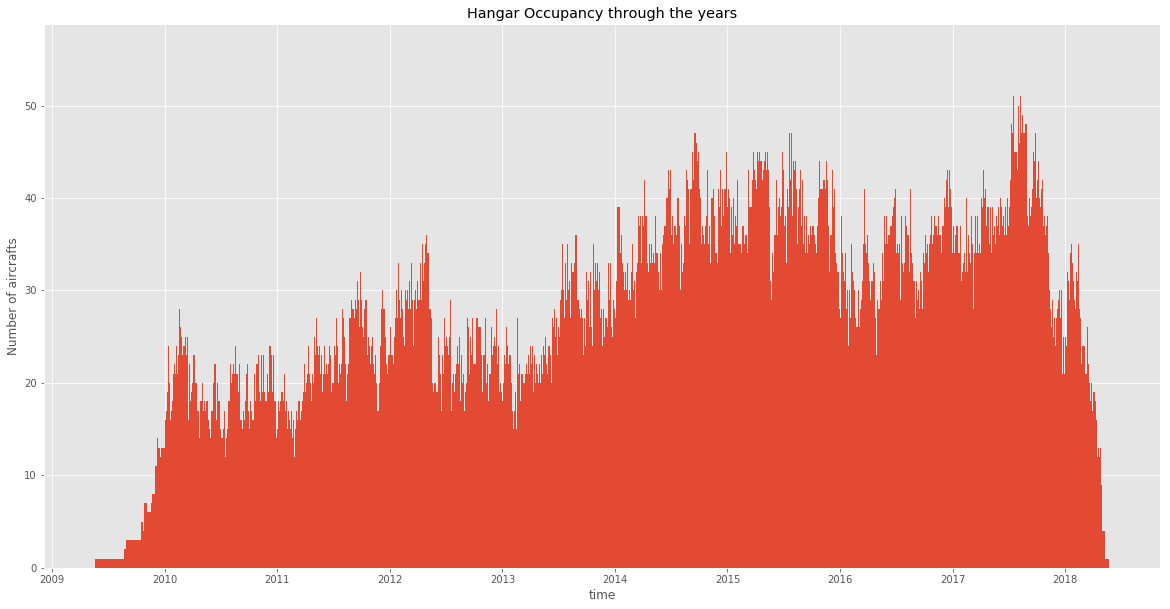

In [10]:
fig = plt.figure(figsize=(20,10))
tmp_series.hist(bins=(df_date.finish.max() - df_date.start.min()).days)
plt.xlabel('time')
plt.ylabel('Number of aircrafts')
plt.title('Hangar Occupancy through the years')
plt.show()

In [11]:
# making sure planes or not counted twice :

In [12]:
lookup = load_('wo_lookup')
lookup.dropna(inplace=True)
lookup['unique_id']= lookup[['AIRCRAFTMODELNUMBER','AIRCRAFTSERIALNUMBER']].apply(lambda x: ''.join(x), axis=1)

In [13]:
lookup = lookup.drop(['ORG','AIRCRAFTSERIALNUMBER', 'AIRCRAFTMODELNUMBER'], axis=1).set_index('WORKORDERKEY')

In [14]:
list_of_days = []
for plane_id in lookup.unique_id.unique():
    wos = lookup.loc[lookup.unique_id==plane_id].index.tolist()
    tmp_df = df_date.loc[df_date.WORKORDERKEY.isin(wos)]
    set_of_date_for_a_plane = set()
    for start_date, end_date in zip(tmp_df.start, tmp_df.finish):
        for single_date in daterange(start_date, end_date):
            set_of_date_for_a_plane.add(single_date)
    list_of_days+=list(set_of_date_for_a_plane)
tmp_series = pd.Series(list_of_days)

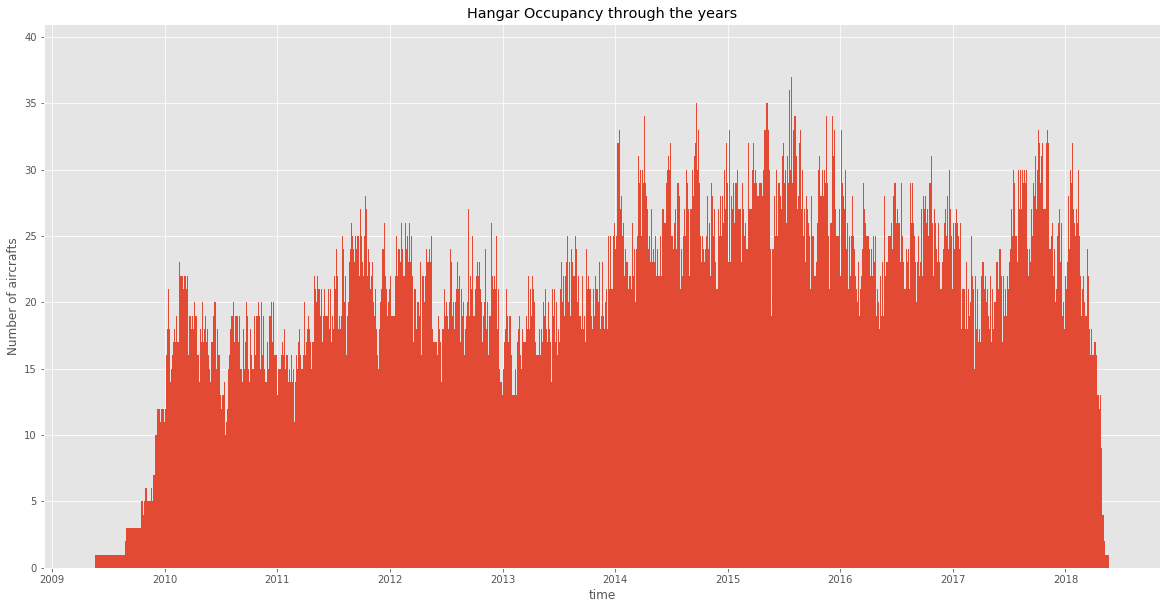

In [15]:
fig = plt.figure(figsize=(20,10))
tmp_series.hist(bins=(df_date.finish.max() - df_date.start.min()).days)
plt.xlabel('time')
plt.ylabel('Number of aircrafts')
plt.title('Hangar Occupancy through the years')
plt.show()

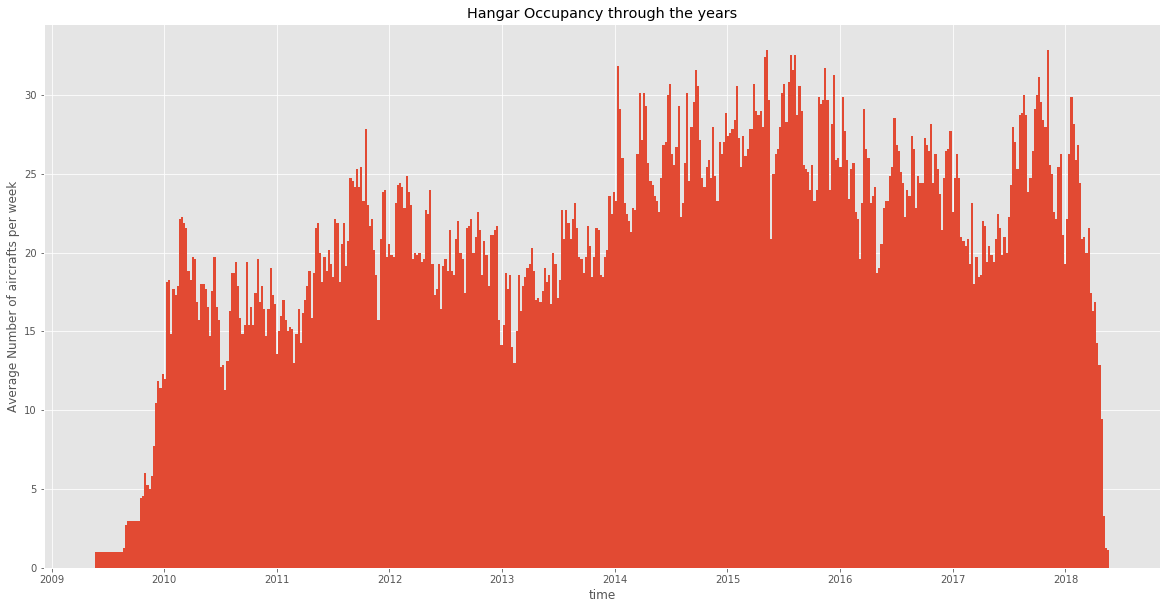

In [16]:
fig = plt.figure(figsize=(20,10))
while (tmp_series.max() - tmp_series.min()).days %7:
    tmp_series = tmp_series[tmp_series!=tmp_series.min()]
tmp_series.hist(bins=(tmp_series.max() - tmp_series.min()).days //7 , weights=[1/7]*len(tmp_series))
plt.xlabel('time')
plt.ylabel('Average Number of aircrafts per week')
plt.title('Hangar Occupancy through the years')
plt.show()

In [17]:
(tmp_series.max() - tmp_series.min()).days //(7*5*2)

47

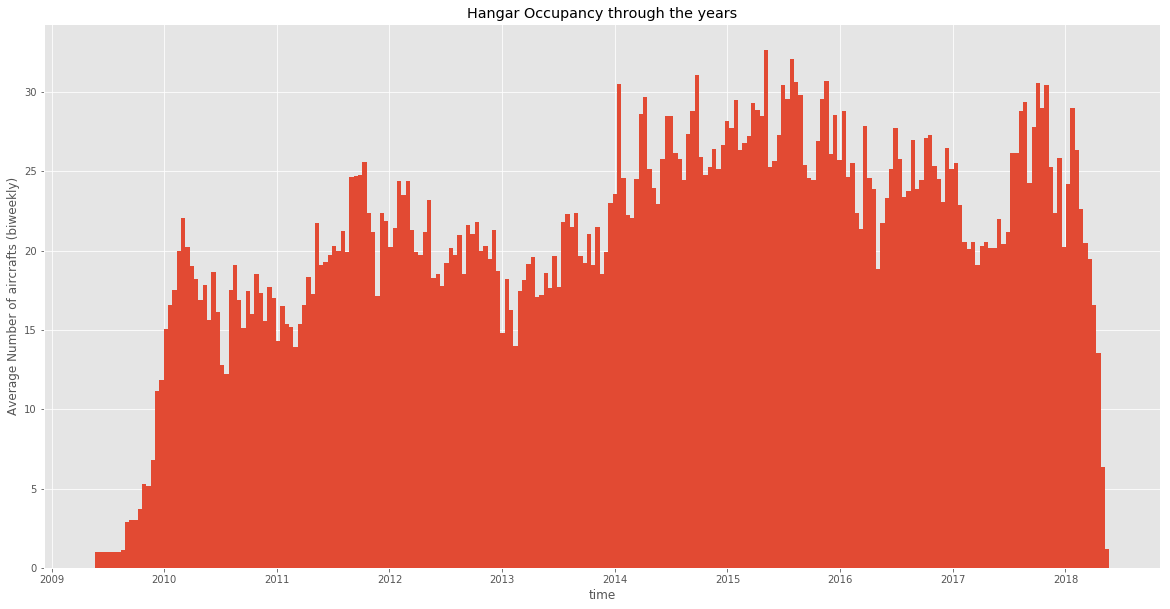

In [18]:
fig = plt.figure(figsize=(20,10))
while (tmp_series.max() - tmp_series.min()).days %14:
    tmp_series = tmp_series[tmp_series!=tmp_series.min()]
tmp_series.hist(bins=(tmp_series.max() - tmp_series.min()).days //14, weights=[1/14]*len(tmp_series))
plt.xlabel('time')
plt.ylabel('Average Number of aircrafts (biweekly)')
plt.title('Hangar Occupancy through the years')
plt.show()

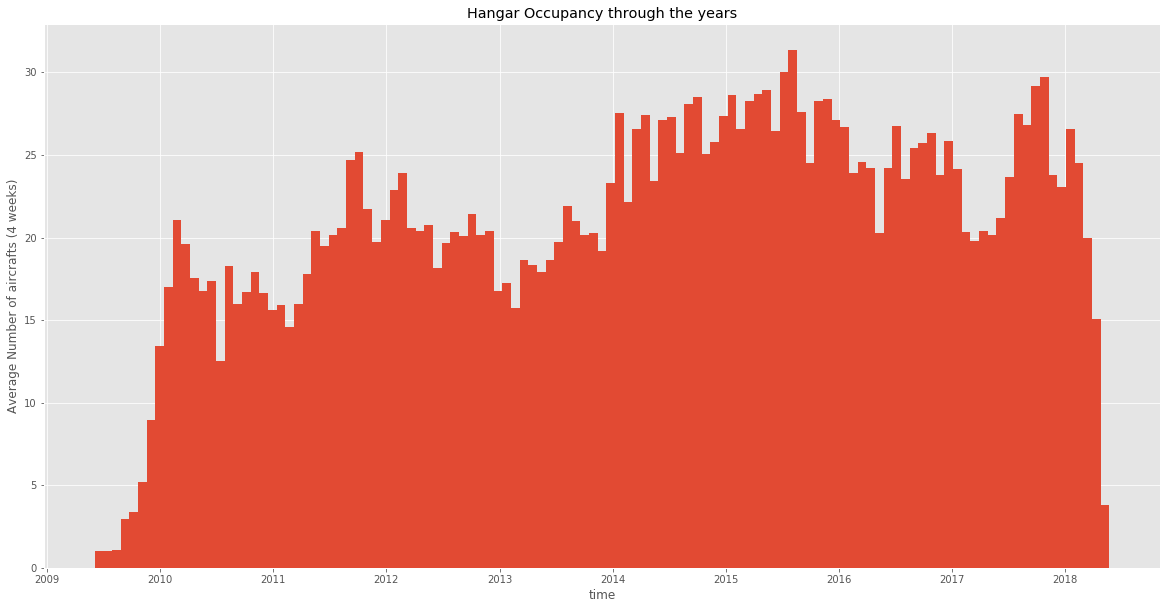

In [19]:
fig = plt.figure(figsize=(20,10))
while (tmp_series.max() - tmp_series.min()).days %28:
    tmp_series = tmp_series[tmp_series!=tmp_series.min()]
tmp_series.hist(bins=(tmp_series.max() - tmp_series.min()).days //28, weights=[1/28]*len(tmp_series))
plt.xlabel('time')
plt.ylabel('Average Number of aircrafts (4 weeks)')
plt.title('Hangar Occupancy through the years')
plt.show()

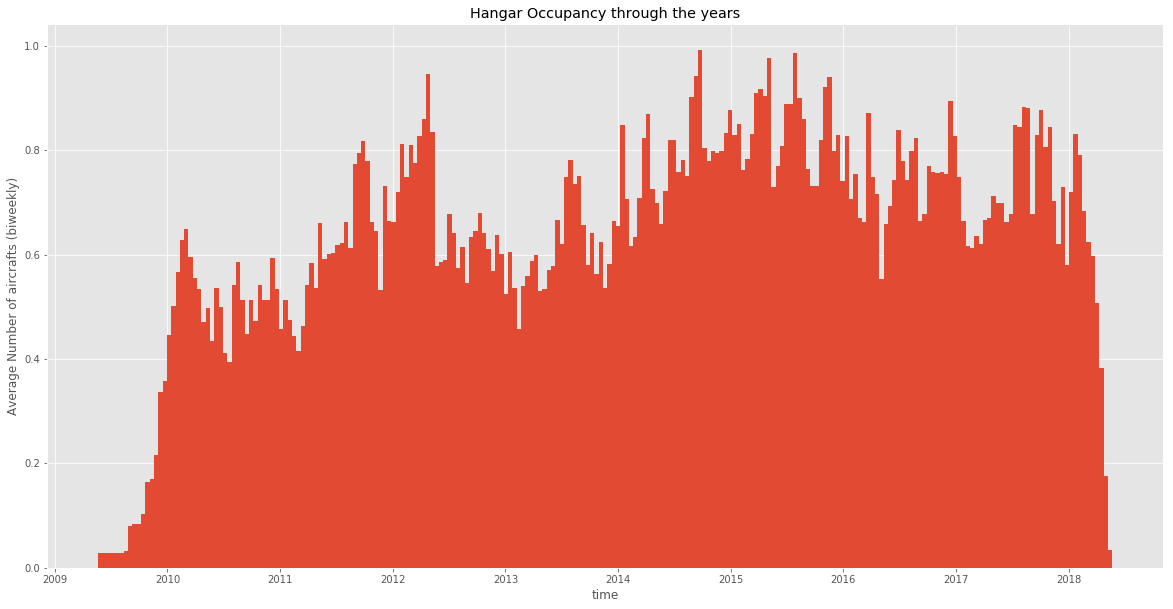

In [24]:
#normed
fig = plt.figure(figsize=(20,10))
while (tmp_series.max() - tmp_series.min()).days %14:
    tmp_series = tmp_series[tmp_series!=tmp_series.min()]
tmp_series.hist(bins=(tmp_series.max() - tmp_series.min()).days //14, weights=[1/(14*36)]*len(tmp_series))
plt.xlabel('time')
plt.ylabel('Average Number of aircrafts (biweekly)')
plt.title('Hangar Occupancy through the years')
plt.show()

In [36]:
import datetime

"\nplt.xlabel('time')\nplt.ylabel('Average Number of aircrafts (biweekly)')\nplt.title('Hangar Occupancy through the years')\nplt.show()"

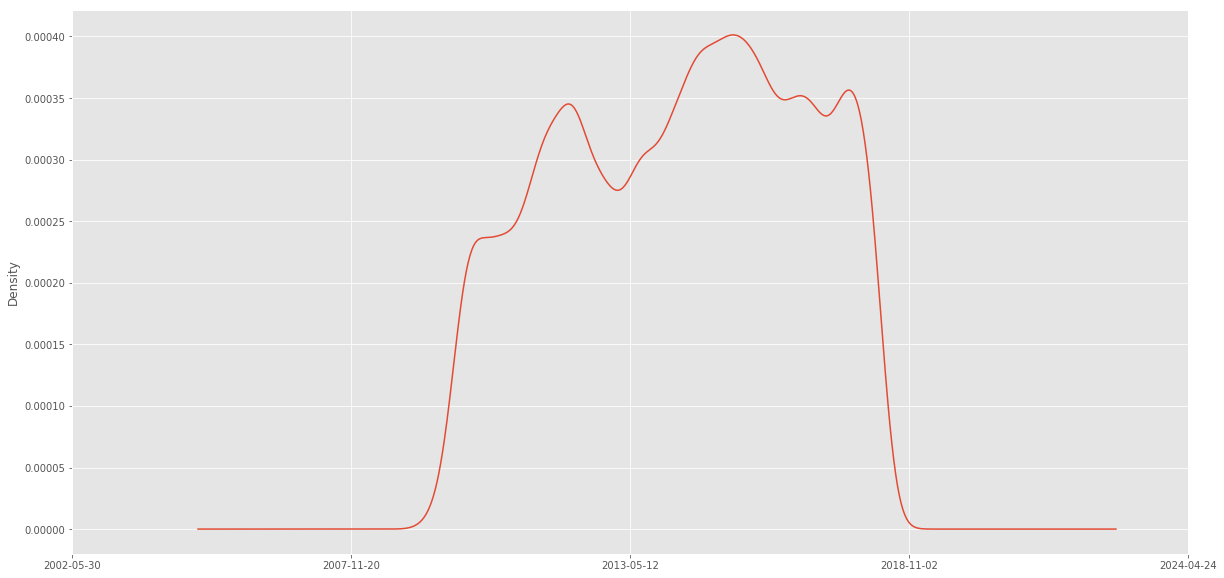

In [37]:
#normed
fig = plt.figure(figsize=(20,10))
while (tmp_series.max() - tmp_series.min()).days %14:
    tmp_series = tmp_series[tmp_series!=tmp_series.min()]

ordinal = pd.Series([x.toordinal() for x in tmp_series])



# plot non-parametric kde on numeric datenum
ax = ordinal.plot(kind='kde')
# rename the xticks with labels
x_ticks = ax.get_xticks()
ax.set_xticks(x_ticks[::2])
xlabels = [datetime.datetime.fromordinal(int(x)).strftime('%Y-%m-%d') for x in x_ticks[::2]]
ax.set_xticklabels(xlabels)

'''
plt.xlabel('time')
plt.ylabel('Average Number of aircrafts (biweekly)')
plt.title('Hangar Occupancy through the years')
plt.show()'''

In [20]:
list_of_days = []
for plane_id in lookup.unique_id.unique():
    wos = lookup.loc[lookup.unique_id==plane_id].index.tolist()
    tmp_df = df_date.loc[df_date.WORKORDERKEY.isin(wos)]
    set_of_date_for_a_plane = []
    for start_date, end_date in zip(tmp_df.start, tmp_df.finish):
        for single_date in daterange(start_date, end_date):
            set_of_date_for_a_plane.append(single_date)
            
    if len(set_of_date_for_a_plane) != len(set(set_of_date_for_a_plane)):
        print(plane_id)
    list_of_days+=list(set_of_date_for_a_plane)
tmp_series = pd.Series(list_of_days)

F7X007
F900EX115
F2000136
F2000EX012
F7X084
F2000EX018
F2000006
F900095
F2000040
F50157
F900184
F900EXEASy169
F2000079
F900EXEASy129
F9000000
F900166
F900EX010
F2000026
F2000LX176
PA-28-181287990347
F2000145
F900DX608
F50048
F900EX008
F7X055
F900EX069
F900EXEASy172
F50EX273
F7X145
F7X098
F900EX071
F7X051
F2000033
F2000LX232
F2000LX229
F2000011
F2000211
F2000192
F900EX080
F900EXEASy136
F900EXEASy235
F7X211
F2000LXS272
F7X176
F2000EXEASy070
F2000EX022
F900148
F900094
F2000041
F2000LX239
F2000087
F7X115
F900LX280
F2000LX253
F2000LX177
F2000EX013
F2000LX202
F900LX258
F7X170
F2000LX168
F2000LX207
F900B178
F900B148
F2000152
F2000218
F2000LXS310
F2000EXEASy051
F900EX081
F900EX029
F900C184
F900B047
F2000EXEASy112
F2000LX182
F7X140
F2000203
F900EX072
F2000LX247
F7X197
F900EXEASy125
F50EX290
F2000146
F2000EXEASy178
F900005
F2000159
F2000025
F2000DX601
F50EX335
F900092
F900EX092
F2000031
F2000LX131
F50090
F900DX615
F50EX289
F2000107
F900037
F2000S720
F2000LX192
F7X208
F2000117
F2000LX218
F900EX05

In [21]:
wos = lookup.loc[lookup.unique_id=='F7X007'].index.tolist()

In [22]:
df_date.loc[df_date.WORKORDERKEY.isin(wos)].sort_values('start')
#df_date.iloc[[913, 830]]
df_date.iloc[[2269,2180]]

,WORKORDERKEY,WOCATEGORY,start,finish,length_of_time_in_days
2269,36521,C-5 (Components),2015-02-27,2015-03-06,7
2180,36110,C-2 (Maintenance only),2015-03-02,2015-03-16,14
